In [2]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [3]:
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_191"; Java(TM) SE Runtime Environment (build 1.8.0_191-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from /home/mori/Documents/h2o/code/h2o-3/build/h2o.jar
  Ice root: /tmp/tmptykl4w0y
  JVM stdout: /tmp/tmptykl4w0y/h2o_mori_started_from_python.out
  JVM stderr: /tmp/tmptykl4w0y/h2o_mori_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.99999
H2O_cluster_version_age:,50 minutes
H2O_cluster_name:,H2O_from_python_mori_21tsju
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.127 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
from h2o.utils.shared_utils import _locate # private function. used to find files within h2o git project directory.

data = h2o.import_file(path=_locate('smalldata/prostate/prostate_cat_NA.csv'))
x = data.names
y = 'CAPSULE'
x.remove(y)

user_splits = dict()
user_splits['AGE'] = [43.0, 44.89473684210526, 46.78947368421053, 48.68421052631579, 50.578947368421055,
                      52.473684210526315, 54.368421052631575, 56.26315789473684, 58.1578947368421,
                      60.05263157894737, 61.94736842105263, 63.84210526315789, 65.73684210526315,
                      67.63157894736842, 69.52631578947368, 71.42105263157895, 73.3157894736842,
                      75.21052631578948, 77.10526315789474]
user_splits['RACE'] = ["Black", "White"]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
# Build a GBM model predicting for response CAPSULE
gbm_model = H2OGradientBoostingEstimator(ntrees=50, learn_rate=0.05, seed=12345)
gbm_model.train(x=x, y=y, training_frame=data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependencePlot progress: |█████████████████████████████████████████| 100%


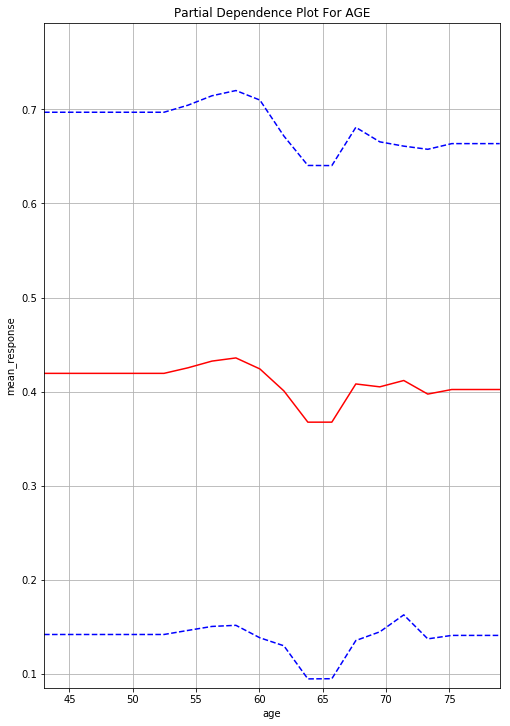

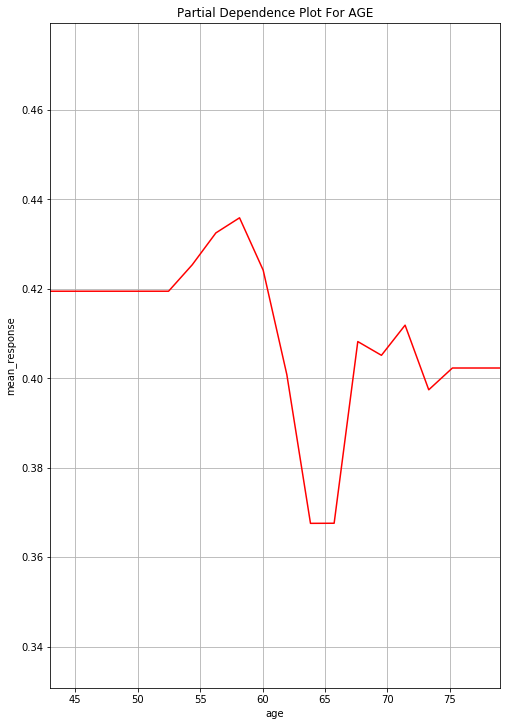

In [9]:
# Plot Partial Dependence for one feature then for both
pdp1 = gbm_model.partial_plot(data=data,cols=['AGE'], plot=True)
pdp2 = gbm_model.partial_plot(data=data,cols=['AGE'], plot=True, plot_stddev=False)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependencePlot progress: |█████████████████████████████████████████| 100%


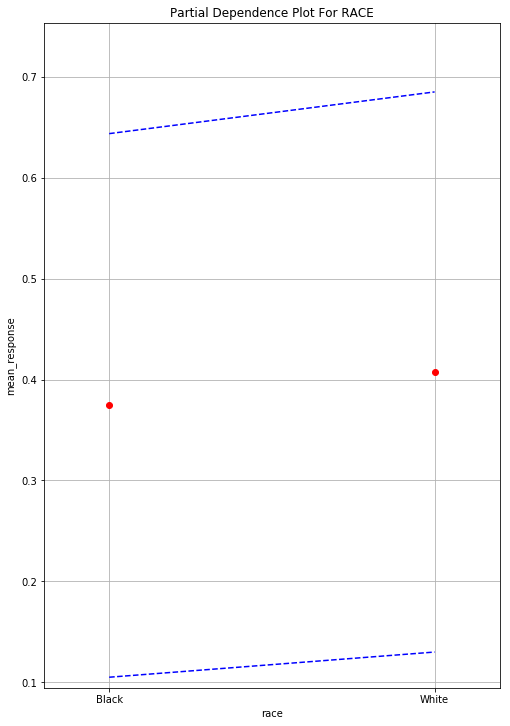

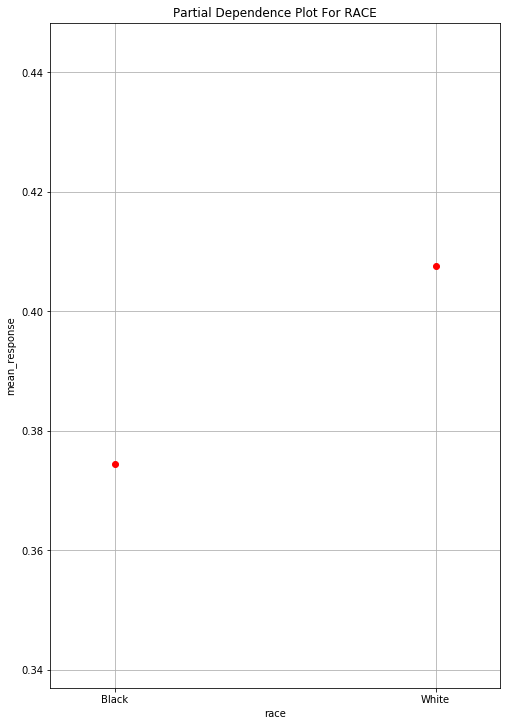

In [8]:
pdp3 = gbm_model.partial_plot(data=data,cols=['RACE'], plot=True)
pdp4 = gbm_model.partial_plot(data=data,cols=['RACE'], plot=True, plot_stddev=False)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependencePlot progress: |█████████████████████████████████████████| 100%


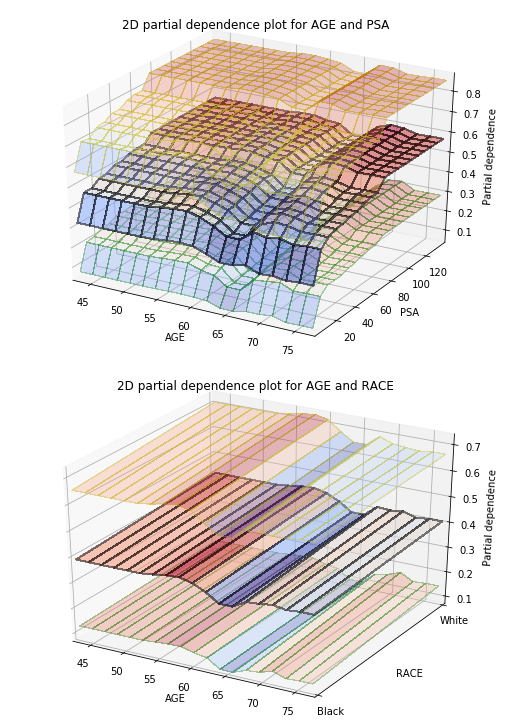

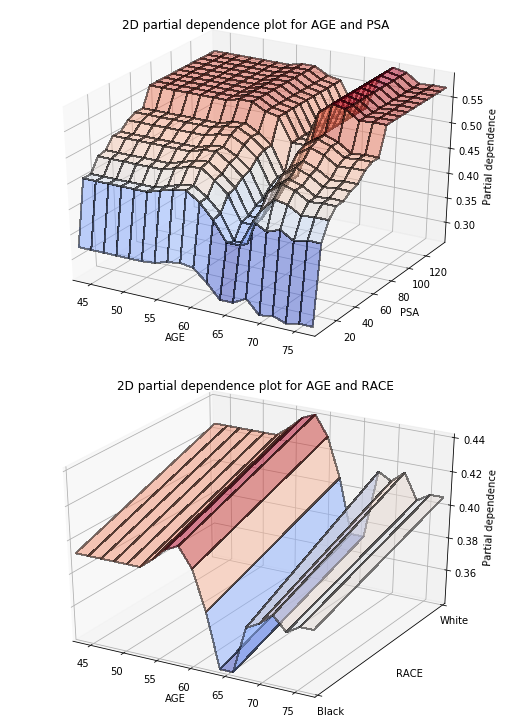

In [11]:
pdp2D1 = gbm_model.partial_plot(data=data, plot=True, user_splits=user_splits,
                                            col_pairs_2dpdp=[['AGE', 'PSA'], ['AGE', 'RACE']])
pdp2D2 = gbm_model.partial_plot(data=data,plot=True, user_splits=user_splits,
                                    col_pairs_2dpdp=[['AGE', 'PSA'], ['AGE', 'RACE']], plot_stddev=False)